# Wrangle and Analyze Data

by  __Kourosh Sadeghi__

## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
In this project, I will go through the process of data wrangling which is gathering, assessing, and cleaning and finally will derive interesting insights from the cleaned data and communicate my findings with visualizations.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import json
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# gathering

we have three datasts that we need to gather them. first dataset is twitter-archive-enhanced.csv that we uplode it in my documnt then I read it by the following code:

In [96]:
df_rate=pd.read_csv('twitter-archive-enhanced.csv')

check this dataset to make sure we got it correctly

In [97]:
df_rate.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


this is thise second dataset. we have URL like of this file. we should use requests to write this file
in a new file (my_image) after that get it by pd.read_csv with separator tab

In [98]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [99]:
r=requests.get(url)

In [100]:
with open('my_image','wb') as file: #this code is for making my_image that contains data in URL
    file.write(r.content)

In [101]:
df_image=pd.read_csv('my_image',sep='\t') # making df_image to use it as a dataset

to make sure this dataset would b made corrctly, we need to see some of its rows:

In [102]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


we are going ahead to third dataset that required to use API of twitter website and get data. but as we do not to register in this website, we use the prepared text file that contain json file to get information about tweet ID, retweet count, and favorite count. firt, we make new_json file after that make a list to append each row, finally we will make a DataFrame as a third dataset

In [103]:
with open('tweet_json.txt','r', encoding='utf-8') as my_json:
    new_json=json.load(my_json)

In [104]:
final_list = []
for dic in new_json:
    tweet_id = dic['id'] # the id of the tweet
    favorite_count = dic['favorite_count'] # the number of favorites that the tweet owns
    retweet_count = dic['retweet_count'] # the number of retweeted counts that the tweet has
    followers_count = dic['user']['followers_count'] # the number of followers of the user who tweeted the tweet
    friends_count = dic['user']['friends_count'] # the number of friends of the user who tweeted the tweet
    source = dic['source'][dic['source'].find('rel=\"nofollow\">') +15 : -4] # what device and app has been
    # used for the tweet
    retweeted_status = dic['retweeted_status'] = dic.get('retweeted_status', 'Original tweet') # if tweet is
    # original or retwet
    only_url = dic['text'][dic['text'].find('https'):] # the web url of the tweet
    if retweeted_status == 'Original tweet':
        url = only_url
    else:
        retweeted_status = 'This is a retweet'
        url = 'This is a retweet'

    final_list.append({'tweet_id': str(tweet_id),
                            'favorite_count': int(favorite_count),
                            'retweet_count': int(retweet_count),
                            'followers_count': int(followers_count),
                            'friends_count': int(friends_count),
                            'url': url,
                            'source': source,
                            'retweeted_status': retweeted_status,
                         })

In [105]:
# create the dataframe from the created final_list
df_retweet = pd.DataFrame(final_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])


we made dataset and we need to check it

In [106]:
df_retweet.head(4)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,37062,7916,8395325,14,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31894,5879,8395325,14,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24005,3882,8395325,14,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,40386,8064,8395325,14,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ


we gathered all of datasets and we need to go second step that is data accessing

# Assessing

in this step we should cheack all of datasets visually and note some of highlight issues. these issues contain quality issues like inaccurate data, missing data, inconsistent data, duplicated and invalid data, lack of tidness like each column would not be one variable, each row would not be one observation and each observational unit would not be a table

## first step: visual assessing

In [107]:
df_rate.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [108]:
df_rate.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [109]:
df_rate.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1476,693629975228977152,NaN,NaN,2016-01-31 03:00:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is afraid of its own feet. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693629975...,12,10,None,None,None,pupper,None
1996,672591762242805761,NaN,NaN,2015-12-04 01:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Taz. He boxes leaves. 10/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591762...,10,10,Taz,None,None,None,None
606,798340744599797760,NaN,NaN,2016-11-15 01:44:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Davey. He'll have your ...,7.717705e+17,4.196984e+09,2016-09-02 18:03:10 +0000,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,None,None,None,None
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
749,779124354206535695,NaN,NaN,2016-09-23 01:04:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Hurley. He's the curly one...,6.794628e+17,4.196984e+09,2015-12-23 00:45:35 +0000,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None


### quality issues of first dataset (df_rate)

in the top record of this dataset,df_rate.head(), we found some fields that contain NaN and we have None for each dog breed coloumn. the other thing, we need to make sure type of some field like tweet_id and timesstamp that should be string and timestamp format respectively. 

list of quality issues by visual:
1. the type of tweet_id and timestamp should be int and timestamp respectively
2. 'a' name of doges are ambiguous that should be consider in programming
3. all of rows in columns (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp) that contain value, should    be removed. because they are retweet
4. all of rows in text 'name' that start with 'RT @' should be removed. because thay are belong to retweet

### Tidness issues of first dataset (df_rate)

list of Tidness issues by visual:

1. all of the breed dogs are related to one variable and they should be change to one field
2. timestamp can be seperated two columns date and time

In [110]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [111]:
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [112]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1336,758355060040593408,https://pbs.twimg.com/media/CoY324eWYAEiDOG.jpg,1,Pembroke,0.987643,True,Cardigan,0.012112,True,Siamese_cat,0.000117,False
836,694206574471057408,https://pbs.twimg.com/media/CaJRMPQWIAA1zL9.jpg,1,Shih-Tzu,0.352547,True,toy_poodle,0.155720,True,Maltese_dog,0.116657,True
1418,771380798096281600,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,1,collie,0.503728,True,Border_collie,0.450944,True,English_springer,0.012693,True
1409,770414278348247044,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.580528,False,maillot,0.081449,False,golden_retriever,0.053570,True
1921,856526610513747968,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,1,Old_English_sheepdog,0.798481,True,Tibetan_terrier,0.060602,True,standard_poodle,0.040722,True


### quality issues of second dataset (df_image)

I did not find any qualities issues in this dataset

### Tidness issues of second dataset (df_image)

I did not find any Tidness issues in this dataset

definitions for this dataset:
tweet_id: It is the unique identifier of each tweet

jpg_url: URL of dog's picture

img_num: Each tweet can have up to 4 images. This number of picture is relevant to the most confident prediction of the neural
network method for each tweet.

p1: p1 is the algorithm's #1 prediction for the image in the tweet

p1_conf: p1_conf is how confident the algorithm is in its #1 prediction

p1_dog: p1_dog is whether or not the #1 prediction is a breed of dog

p2: p2 is the algorithm's second most likely prediction

p2_conf: p2_conf is how confident the algorithm is in its #2 prediction

p2_dog: p2_dog is whether or not the #2 prediction is a breed of dog

p3: p3 is the algorithm's third most likely prediction

p3_conf: p3_conf is how confident the algorithm is in its #3 prediction

p3_dog: p3_dog is whether or not the #3 prediction is a breed of dog

In [113]:
df_retweet.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,37062,7916,8395325,14,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31894,5879,8395325,14,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24005,3882,8395325,14,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,40386,8064,8395325,14,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,38605,8748,8395325,14,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [114]:
df_retweet.tail()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2327,666049248165822465,101,41,8395349,14,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2328,666044226329800704,280,135,8395349,14,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2329,666033412701032449,119,43,8395349,14,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2330,666029285002620928,123,45,8395349,14,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI
2331,666020888022790149,2476,478,8395349,14,Twitter for iPhone,Original tweet,https://t.co/BLDqew2Ijj


In [115]:
df_retweet.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
676,786729988674449408,0,2524,8395326,14,Twitter for iPhone,This is a retweet,This is a retweet
324,832369877331693569,17636,3288,8395327,14,Twitter for iPhone,Original tweet,https://t.co/Dhdx5HnQ4d
1772,677301033169788928,1244,407,8395339,14,Twitter for iPhone,Original tweet,https://t.co/IoLRvF0Kak
1284,707315916783140866,2527,657,8395336,14,Twitter for iPhone,Original tweet,https://t.co/BjpOa52jQ4
2281,666837028449972224,795,538,8395349,14,Twitter for iPhone,Original tweet,https://t.co/xYGdBrMS9h


### quality issues of third dataset (df_retweet)

I did not find any qualities issues in this dataset

### Tidness issues of third dataset (df_retweet)

I did not find any qualities issues in this dataset

## second step: programatic assessing

for this part we need to use some methods in pandas library to find any issue in datasets for example info, describe, duplicate, value_counts

### first dataset (df_rate)

In [116]:
# with this code, we can understand about the number of rows and columns
df_rate.shape

(2356, 17)

In [117]:
# two factors are really important to get from info(): type of fields and number of missing value for each column
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

about missing value in this dataset, all missing value are about the fields that we can not calculate any function on them

### qaulity issues:
1. format of tweet_id should be string
2. format of timstamp field should be changed to timstamp rather than object
3. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id are float and should be string

### Tidness issuse:
1. all breeds are belong to one variable that its name going to be breed
2. some columns are not required for us. we need to remove them (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)

two columns are numeric that are really important for calculation. that is why we need to check their outlier data with boxplot or value_count method

In [118]:
df_rate[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


### Tidness issuse:
3. rating_denominator shoud be 10. we have some value greater than 10. thus it is better to use new variable that calculated rating_numerator / rating_denominator . this value show the real score for rating of dogs

at this time we want to check duplicated rows and consider duplicated value in each columns:

In [119]:
# we do not have any duplicated rows, but to get some information about the duplicated data in each column,
# we should use value_count
sum(df_rate.duplicated())

0

by using value_counts we can get some results:
invalid data in each column / inconsistnt data / duplicated data and check them / inacurate value

tweet_id is unique field that their value should not be repetitive

In [120]:
# we do not have repetitive value in this field
df_rate['tweet_id'].duplicated().sum()

0

In [121]:
# we do not see any issue in varieties of source
df_rate['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [122]:
# as we see in output, we found 'a' as name. while it made a mistake in data entry. wee need to remove it.
#in eddition we need to check other articles like 'the' and 'an'
df_rate['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Angel        1
Eazy         1
Chloe        1
Bert         1
Bobb         1
Name: name, Length: 957, dtype: int64

In [123]:
# we found 8 'the' article and found 7 'an' article
df_rate['name'].value_counts()['the'],df_rate['name'].value_counts()['an']

(8, 7)

### qaulity issues:
4. change names that contain ('a' , 'the' , 'an') with correct name or NaN

we need to check all of the breeds to make sure data in each column contain just its breed name. after that we want to check:
is there observation that its text field contain breed name that it has not be entered in breed name column??

In [124]:
df_rate['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [125]:
sum(df_rate.text.str.find("doggo")!=-1)

98

we understood that we have 98 obsrvations that contain 'doggo' breed. we make new function that calculate some index in dataset contain 'doggo' that they are none in doggo column

In [126]:
def unmatching(s1,s2):   # this function get 2 input as series
    ind=[]
    if len(s1)>= len(s2):
        for y in s1:
            if sum(y==s2)==0:
                ind.append(y)
    else:
        for y in s2:
            if sum(y==s1)==0:
                ind.append(y)
    return ind
        

In [127]:
index1=df_rate[df_rate.text.str.find("doggo")!=-1].index
index2=df_rate[df_rate['doggo']=='doggo'].index

In [128]:
unmatch_doggo=unmatching(index1,index2)
unmatch_doggo

[83, 268, 302, 475, 477, 798, 934, 946, 987, 1120]

we need to make sure in all of those rows should not have other breed. otherwise all of the columns should be None in these rows exept doggo

In [129]:
np.sum(df_rate.loc[unmatch_doggo,['doggo','floofer','pupper','puppo']]!='None')
#that is right

doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

In [130]:
df_rate['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [131]:
index1=df_rate[df_rate.text.str.find("floofer")!=-1].index
index2=df_rate[df_rate['floofer']=='floofer'].index

In [132]:
unmatch_floofer=unmatching(index1,index2)
unmatch_floofer

[200, 984, 1091, 1110, 1534, 1614]

we need to make sure in all of those rows should not have other breed. otherwise all of the columns should be None in these rows exept floofer

In [133]:
np.sum(df_rate.loc[unmatch_floofer,['doggo','floofer','pupper','puppo']]!='None')
# we found one row that contain doggo, while we found floofer in that text. we need to consider

doggo      1
floofer    6
pupper     0
puppo      0
dtype: int64

In [134]:
df_rate.loc[unmatch_floofer][df_rate.loc[unmatch_floofer]['doggo']=='doggo'].loc[200,'text']

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

we understood of text that real breed of this dog is floofer not doggo

### qaulity issues:
5. in index number 200, doggo column should be changed from doggo to None

In [135]:
df_rate['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [136]:
index1=df_rate[df_rate.text.str.find("pupper")!=-1].index
index2=df_rate[df_rate['pupper']=='pupper'].index

In [137]:
unmatch_pupper=unmatching(index1,index2)
unmatch_pupper

[54,
 993,
 1027,
 1093,
 1220,
 1228,
 1254,
 1265,
 1351,
 1516,
 1634,
 1635,
 1636,
 1643,
 1710,
 1712,
 1743,
 1826,
 1843,
 1847,
 1862,
 1900,
 1928,
 2141]

we need to make sure in all of those rows should not have other breed. otherwise all of the columns should be None in these rows exept pupper

In [138]:
np.sum(df_rate.loc[unmatch_pupper,['doggo','floofer','pupper','puppo']]!='None')
# that is right

doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

In [139]:
df_rate['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [140]:
index1=df_rate[df_rate.text.str.find("puppo")!=-1].index
index2=df_rate[df_rate['puppo']=='puppo'].index

In [141]:
unmatch_puppo=unmatching(index1,index2)
unmatch_puppo

[85, 106, 134, 172, 228, 274, 296, 545]

we need to make sure in all of those rows should not have other breed. otherwise all of the columns should be None in these rows exept puppo

In [142]:
np.sum(df_rate.loc[unmatch_puppo,['doggo','floofer','pupper','puppo']]!='None')
# we found one row that contain doggo, while we found puppo in that text. we need to consider

doggo      1
floofer    0
pupper     0
puppo      0
dtype: int64

In [143]:
df_rate.loc[unmatch_puppo][df_rate.loc[unmatch_puppo]['doggo']=='doggo'].loc[172,'text']

"I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq"

I think, from this text real breed of this dog is puppon not doggo

### qaulity issues:
6. in index number 172, doggo column should be changed from doggo to None

### qaulity issues:

7. fill out dogoo field with 'dogoo' instead of None in index number: unmatch_dogoo
8. fill out floofer field with 'floofer' instead of None in index number: unmatch_floofer
9. fill out pupper field with 'pupper' instead of None in index number: unmatch_pupper
10. fill out puppo field with 'puppo' instead of None in index number: unmatch_puppo

### second dataset (df_image)

In [144]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [145]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### qaulity issues:
11. type of tweet_id should be changed to string

In [146]:
# tweet_id is unique field that their value should not be repetitive
df_image['tweet_id'].duplicated().sum()

0

In [147]:
df_image['jpg_url'].value_counts()[df_image['jpg_url'].value_counts()>1]
# we have lots record that jpg_url repetitive more than 1
# we need to check for one of them to figur out those records are duplicated or not

https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                2
                                                              ..
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg    2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                2
Name: jpg_url, Length: 66, dtype: int64

In [148]:
df_image[df_image['jpg_url']=='https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.00105,True
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.00105,True


all of those columns have same values, just tweet_id is different. that is why, this rows are repetitive. we need to remove one of them. in practice, one of the tweet_id is main and other can be retweet
to find out other jpg_url repetitive, we can mak new dataset that contain all of the df_image fields except tweet_id. finally in this new dataset we can determine duplicated rows

In [149]:
df_image2=df_image.drop(['tweet_id'],axis=1)

In [150]:
df_image2.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [151]:
df_image2.duplicated().sum()

66

we have 66 rows duplicated that we should remove them from df_image. but the only thing to reach out this purpose is determine index of these repetitive observations

### qaulity issues:
12. remove 66 duplicated rows from df_image

In [152]:
index_remove=df_image2.duplicated()[df_image2.duplicated()==True].index

In [153]:
df_image['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### third dataset (df_retweet)

In [154]:
df_retweet.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,37062,7916,8395325,14,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31894,5879,8395325,14,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24005,3882,8395325,14,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,40386,8064,8395325,14,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,38605,8748,8395325,14,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [155]:
df_retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2332 non-null   object
 1   favorite_count    2332 non-null   int64 
 2   retweet_count     2332 non-null   int64 
 3   followers_count   2332 non-null   int64 
 4   friends_count     2332 non-null   int64 
 5   source            2332 non-null   object
 6   retweeted_status  2332 non-null   object
 7   url               2332 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.9+ KB


In [156]:
df_retweet['tweet_id'].duplicated().sum() # we do not have tweet_id repetitive

0

In [157]:
df_retweet.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2332.000000,2332.000000,2.332000e+03,2332.0
mean,7732.464408,2787.032590,8.395331e+06,14.0
std,11999.390534,4715.928094,5.430818e+01,0.0
min,0.000000,1.000000,8.394677e+06,14.0
25%,1346.750000,560.750000,8.395327e+06,14.0
50%,3369.500000,1304.000000,8.395336e+06,14.0
75%,9488.000000,3241.000000,8.395339e+06,14.0
max,160124.000000,80052.000000,8.395349e+06,14.0


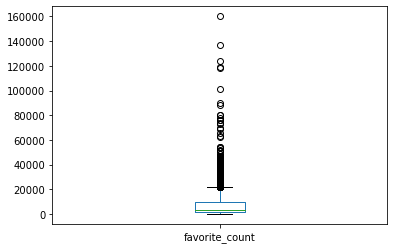

In [158]:
df_retweet["favorite_count"].plot(kind='box');

### qaulity issues:
13. favorite_count greater than 40000 better to removed, these data are outlier (removing them can help us for data analysis)

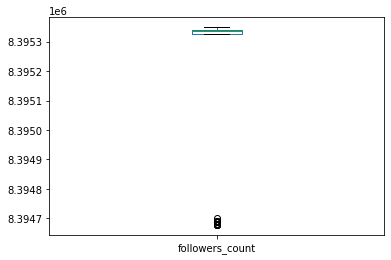

In [159]:
df_retweet["followers_count"].plot(kind="box");

### qaulity issues:
14. followers_count greater less than 8.395131e+06 should to removed, these data are outlier (removing them can help us for data analysis)

In [160]:
df_retweet['source'].value_counts()

Twitter for iPhone     2198
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [161]:
df_retweet['retweeted_status'].value_counts()

Original tweet       2168
This is a retweet     164
Name: retweeted_status, dtype: int64

In [162]:
df_retweet['url'].value_counts()[df_retweet['url'].value_counts()>1]
# we found one url that is repetitive. we need to consider it

This is a retweet          164
0                           16
u                            5
s                            5
e                            4
t                            3
n                            3
y                            3
5                            2
C                            2
g                            2
https://t.co/roqIxCvEB3      2
Name: url, dtype: int64

In [163]:
df_retweet[df_retweet['url']=='https://t.co/roqIxCvEB3']
# it doesnt have any issue

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
639,791774931465953280,47139,23351,8395326,14,Vine - Make a Scene,Original tweet,https://t.co/roqIxCvEB3
2188,668587383441514497,1655,1054,8394700,14,Vine - Make a Scene,Original tweet,https://t.co/roqIxCvEB3


finally we should know which columns are common in 3 datasets

In [164]:
all_columns=pd.Series(list(df_rate)+list(df_image)+list(df_retweet))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
34      source
dtype: object

find out the number of tweets which are in df_rate and not in df_imag dataframe

In [165]:
len(unmatching(df_rate['tweet_id'],df_image['tweet_id']))

281

## All of the issues

### quality issues for df_rate

1. format of tweet_id should be string

2. format of timstamp field should be changed to timstamp rather than object

3. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id are float and should be string

4. change names that contain ('a' , 'the' , 'an') with correct name or NaN

5. in index number 200, doggo column should be changed from doggo to None

6. in index number 172, doggo column should be changed from doggo to None

7. fill out dogoo field with 'dogoo' instead of None in index number: unmatch_dogoo

8. fill out floofer field with 'floofer' instead of None in index number: unmatch_floofer

9. fill out pupper field with 'pupper' instead of None in index number: unmatch_pupper

10. fill out puppo field with 'puppo' instead of None in index number: unmatch_puppo

11. all of rows in columns (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp) that contain value, should    be removed. because they are retweet

12. all of rows in text 'name' that start with 'RT @' should be removed. because thay are belong to retweet

### quality issues for df_image

13. type of tweet_id should be changed to string
14. remove 66 duplicated rows from df_image

### quality issues for df_retweet

15. favorite_count greater than 40000 better to removed, these data are outlier (removing them can help us for data analysis)
16. followers_count greater less than 8.395131e+06 should to removed, these data are outlier (removing them can help us for data analysis)

### Tidness issues for df_rate

1. all breeds are belong to one variable that its name going to be breed
2. timestamp can be seperated two columns date and time
3. some columns are not required for us. we need to remove them (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)
4. rating_denominator shoud be 10. we have some value greater than 10. thus it is better to use new variable that calculated rating_numerator / rating_denominator . this value show the real score for rating of dogs

### Tidness issues totally

5. all of the three datasets should be merge by tweet_id column as a primary key

# Cleaning

before starting cleaning, we should have copy of all datasets

In [166]:
clean_rate=df_rate.copy()
clean_image=df_image.copy()
clean_retweet=df_retweet.copy()

## for quality issues

### define

format of tweet_id should be string (clean_rate)

### code

In [167]:
clean_rate['tweet_id']=clean_rate['tweet_id'].astype(str)

### test

In [168]:
clean_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### define

format of timstamp field should be changed to timstamp or datetime rather than object (clean_rate)

### code

In [169]:
clean_rate['timestamp']=pd.to_datetime(clean_rate['timestamp'])

### test

In [170]:
clean_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### define

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id are float and should be string (clean_rate)

### code

In [171]:
# clean_rate['in_reply_to_status_id']=clean_rate['in_reply_to_status_id'].astype(str)
# clean_rate['in_reply_to_user_id']=clean_rate['in_reply_to_user_id'].astype(str)
# clean_rate['retweeted_status_id']=clean_rate['retweeted_status_id'].astype(str)
# clean_rate['retweeted_status_user_id']=clean_rate['retweeted_status_user_id'].astype(str)

### test

In [172]:
clean_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### define

change names that contain ('a' , 'the' , 'an') with correct name or NaN (clean_rate)

### code

In [173]:
clean_rate[clean_rate['name']=='the'].head(4)
# in this output we could not find th main name. that is why we should replace all 'a','the' and 'an' to None
# the most importany thing for this replacment would be that: all of names start with capital word. thus we should change
# all the name that start with lower case with None

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None


In [174]:
clean_rate['name'][clean_rate['name'].str.match('[a-z]+')]='None'

### test

In [175]:
'the' in clean_rate['name'].unique(),'a' in clean_rate['name'].unique(),'an' in clean_rate['name'].unique()

(False, False, False)

### define

in index number 200, doggo column should be changed from doggo to None (clean_rate)

### code

In [176]:
clean_rate.loc[200,'doggo']="None"

### test

In [177]:
clean_rate.loc[200,'doggo']

'None'

### define

in index number 172, doggo column should be changed from doggo to None (clean_rate)

### code

In [178]:
clean_rate.loc[172,'doggo']="None"

### test

In [179]:
clean_rate.loc[172,'doggo']

'None'

### define

fill out dogoo field with 'dogoo' instead of None in index number: unmatch_doggo (clean_rate)

### code

In [180]:
clean_rate.loc[unmatch_doggo,'doggo']='doggo'

### test

In [181]:
clean_rate.loc[unmatch_doggo]['doggo']

83      doggo
268     doggo
302     doggo
475     doggo
477     doggo
798     doggo
934     doggo
946     doggo
987     doggo
1120    doggo
Name: doggo, dtype: object

### define

fill out floofer field with 'floofer' instead of None in index number: unmatch_floofer (clean_rate)

### code

In [182]:
clean_rate.loc[unmatch_floofer,'floofer']='floofer'

### test

In [183]:
clean_rate.loc[unmatch_floofer]['floofer']

200     floofer
984     floofer
1091    floofer
1110    floofer
1534    floofer
1614    floofer
Name: floofer, dtype: object

### define

fill out pupper field with 'pupper' instead of None in index number: unmatch_pupper (clean_rate)

### code

In [184]:
clean_rate.loc[unmatch_pupper,'pupper']='pupper'

### test

In [185]:
clean_rate.loc[unmatch_pupper]['pupper']

54      pupper
993     pupper
1027    pupper
1093    pupper
1220    pupper
1228    pupper
1254    pupper
1265    pupper
1351    pupper
1516    pupper
1634    pupper
1635    pupper
1636    pupper
1643    pupper
1710    pupper
1712    pupper
1743    pupper
1826    pupper
1843    pupper
1847    pupper
1862    pupper
1900    pupper
1928    pupper
2141    pupper
Name: pupper, dtype: object

### define

fill out puppo field with 'puppo' instead of None in index number: unmatch_puppo (clean_rate)

### code

In [186]:
clean_rate.loc[unmatch_puppo,'puppo']='puppo'

### test

In [187]:
clean_rate.loc[unmatch_puppo]['puppo']

85     puppo
106    puppo
134    puppo
172    puppo
228    puppo
274    puppo
296    puppo
545    puppo
Name: puppo, dtype: object

### define

all of rows in columns (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp) that contain value, should be removed. because they are retweet

### code

In [188]:
clean_rate.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [189]:
clean_rate=clean_rate[clean_rate['retweeted_status_id'].isnull()]
clean_rate=clean_rate[clean_rate['retweeted_status_user_id'].isnull()]
clean_rate=clean_rate[clean_rate['retweeted_status_timestamp'].isnull()]

### test

In [190]:
clean_rate['retweeted_status_id'].value_counts(),clean_rate['retweeted_status_user_id'].value_counts(),clean_rate['retweeted_status_timestamp'].value_counts()

(Series([], Name: retweeted_status_id, dtype: int64),
 Series([], Name: retweeted_status_user_id, dtype: int64),
 Series([], Name: retweeted_status_timestamp, dtype: int64))

### define

all of rows in text 'name' that start with 'RT @' should be removed. because thay are belong to retweet

### code

In [191]:
clean_rate.shape

(2175, 17)

In [192]:
clean_rate['text'][clean_rate['text'].str[:2]=='RT']

1286    RT if you are as ready for summer as this pup ...
1860    RT until we find this dog. Clearly a cool dog ...
Name: text, dtype: object

In [193]:
clean_rate=clean_rate[clean_rate['text'].str[:2]!='RT']

### test

In [194]:
clean_rate[clean_rate['text'].str[:2]=='RT']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### define

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id are float and should be string (clean_rate)

### code

In [195]:
clean_rate['in_reply_to_status_id']=clean_rate['in_reply_to_status_id'].astype(str)
clean_rate['in_reply_to_user_id']=clean_rate['in_reply_to_user_id'].astype(str)
clean_rate['retweeted_status_id']=clean_rate['retweeted_status_id'].astype(str)
clean_rate['retweeted_status_user_id']=clean_rate['retweeted_status_user_id'].astype(str)

### test

In [196]:
clean_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2173 non-null   object             
 1   in_reply_to_status_id       2173 non-null   object             
 2   in_reply_to_user_id         2173 non-null   object             
 3   timestamp                   2173 non-null   datetime64[ns, UTC]
 4   source                      2173 non-null   object             
 5   text                        2173 non-null   object             
 6   retweeted_status_id         2173 non-null   object             
 7   retweeted_status_user_id    2173 non-null   object             
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2115 non-null   object             
 10  rating_numerator            2173 non-null   int64           

### define

type of tweet_id should be changed to string (clean_image)

### code

In [197]:
clean_image['tweet_id']=clean_image['tweet_id'].astype(str)

### test

In [198]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### define

remove 66 duplicated rows from df_image (clean_image)

### code

In [199]:
# we specified all the index of rows should be removed in data assessing (index_remove)
clean_image.drop(index_remove,inplace=True)

### test

In [200]:
clean_image2=clean_image.drop(['tweet_id'],axis=1)
sum(clean_image2.duplicated())

0

### define

favorite_count greater than 40000 better to removed, these data are outlier (removing them can help us for data analysis) (clean_retweet)

### code

In [201]:
clean_retweet=clean_retweet[clean_retweet['favorite_count']<=40000]

### test

In [202]:
sum(clean_retweet['favorite_count']>40000)

0

### define

followers_count greater less than 8.395131e+06 should to removed, these data are outlier (removing them can help us for data analysis) (clean_retweet)

### code

In [203]:
clean_retweet=clean_retweet[clean_retweet['followers_count']>8.395131e+06]

### test

In [204]:
sum(clean_retweet['followers_count']<=8.395131e+06)

0

## for Tidness issues

### define

all breeds are belong to one variable that its name going to be breed (clean_rate)

### code

In [205]:
id_var=pd.Series(list(clean_rate))[0:13]
clean_rate=pd.melt(clean_rate,id_vars=id_var,value_vars=["doggo","floofer","pupper","puppo"],var_name='breed_name',value_name='breed')

In [206]:
clean_rate.drop(['breed_name'],axis=1,inplace=True)

### test

In [207]:
clean_rate.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,breed
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


### define

removing all of None value in new breed column (clean_rate)

### code

In [208]:
clean_rate=clean_rate[clean_rate['breed']!='None']
clean_rate=clean_rate.reset_index()

### test

In [209]:
sum(clean_rate['breed']=='None')

0

### define

timestamp can be seperated two columns date and time (clean_rate)

### code

In [210]:
clean_rate["date"]=clean_rate['timestamp'].apply(lambda x: x.date())
clean_rate["time"]=clean_rate['timestamp'].apply(lambda x: x.time())
clean_rate.drop(['timestamp'],axis=1,inplace=True)

### test

In [211]:
clean_rate.head()

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,breed,date,time
0,9,890240255349198849,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,2017-07-26,15:59:51
1,40,884162670584377345,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,nan,nan,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2017-07-09,21:29:42
2,76,876537666061221889,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,nan,nan,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,doggo,2017-06-18,20:30:39
3,89,872967104147763200,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,2017-06-09,00:02:31
4,97,871515927908634625,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,nan,nan,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,2017-06-04,23:56:03


### define

some columns are not required for us. we need to remove them (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp) (clean_rate)

### code

In [212]:
column_remove=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
clean_rate.drop(column_remove,axis=1,inplace=True)

### test

In [213]:
pd.Series(list(clean_rate))

0                  index
1               tweet_id
2                 source
3                   text
4          expanded_urls
5       rating_numerator
6     rating_denominator
7                   name
8                  breed
9                   date
10                  time
dtype: object

### define

rating_denominator shoud be 10. we have some value greater than 10. thus it is better to use new variable that calculated rating_numerator / rating_denominator . this value show the real score for rating of dogs (clean_rate)

### code

In [214]:
clean_rate['score'] = clean_rate['rating_numerator'] / clean_rate['rating_denominator']

In [215]:
clean_rate.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

### test

In [216]:
clean_rate.head()

,index,tweet_id,source,text,expanded_urls,name,breed,date,time,score
0,9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,2017-07-26,15:59:51,1.4
1,40,884162670584377345,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,Yogi,doggo,2017-07-09,21:29:42,1.2
2,76,876537666061221889,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,https://twitter.com/mpstowerham/status/8761629...,None,doggo,2017-06-18,20:30:39,1.4
3,89,872967104147763200,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,None,doggo,2017-06-09,00:02:31,1.2
4,97,871515927908634625,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,Napolean,doggo,2017-06-04,23:56:03,1.2


# storing data

### define

all of the three datasets should be merge by tweet_id column as a primary key

### code

In [217]:
twitter_archive_master = clean_rate.merge(clean_image, on = 'tweet_id', how = 'inner')
twitter_archive_master = twitter_archive_master.merge(clean_retweet, on = 'tweet_id' , how = 'inner')

### test

In [218]:
twitter_archive_master.shape

(330, 28)

In [219]:
twitter_archive_master.head()

,index,tweet_id,source_x,text,expanded_urls,name,breed,date,time,score,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
0,9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,2017-07-26,15:59:51,1.4,...,Chihuahua,0.029248,True,30567,6886,8395325,14,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0
1,40,884162670584377345,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,Yogi,doggo,2017-07-09,21:29:42,1.2,...,Norwegian_elkhound,0.049148,True,19528,2790,8395325,14,Twitter for iPhone,Original tweet,https://t.co/KcQj5mNR4m
2,89,872967104147763200,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,None,doggo,2017-06-09,00:02:31,1.2,...,German_short-haired_pointer,0.092861,True,26273,5112,8395325,14,Twitter for iPhone,Original tweet,https://t.co/8rpIJr9sAC
3,97,871515927908634625,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,Napolean,doggo,2017-06-04,23:56:03,1.2,...,swab,0.003228,False,19460,3286,8395325,14,Twitter for iPhone,Original tweet,https://t.co/1HZLp9TE6u
4,108,869596645499047938,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,Scout,doggo,2017-05-30,16:49:31,1.2,...,muzzle,0.006296,False,15484,2990,8395325,14,Twitter for iPhone,Original tweet,https://t.co/8UTtgmsPdl


In [220]:
twitter_archive_master=twitter_archive_master.reset_index()
# store the final dataset in csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index = False)

## Analyzing and Visualizing Data

this is the final part of this project. we are eager to analysis data for this dataset

In [6]:
df=pd.read_csv('twitter_archive_master.csv')

In [7]:
df.head()

,level_0,index,tweet_id,source_x,text,expanded_urls,name,breed,date,time,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
0,0,9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,2017-07-26,15:59:51,...,Chihuahua,0.029248,True,30567,6886,8395325,14,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0
1,1,40,884162670584377345,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,Yogi,doggo,2017-07-09,21:29:42,...,Norwegian_elkhound,0.049148,True,19528,2790,8395325,14,Twitter for iPhone,Original tweet,https://t.co/KcQj5mNR4m
2,2,89,872967104147763200,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,None,doggo,2017-06-09,00:02:31,...,German_short-haired_pointer,0.092861,True,26273,5112,8395325,14,Twitter for iPhone,Original tweet,https://t.co/8rpIJr9sAC
3,3,97,871515927908634625,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,Napolean,doggo,2017-06-04,23:56:03,...,swab,0.003228,False,19460,3286,8395325,14,Twitter for iPhone,Original tweet,https://t.co/1HZLp9TE6u
4,4,108,869596645499047938,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,Scout,doggo,2017-05-30,16:49:31,...,muzzle,0.006296,False,15484,2990,8395325,14,Twitter for iPhone,Original tweet,https://t.co/8UTtgmsPdl


this dataset has alot of columns that we do not need some of them for data exploration and data analysis

In [8]:
pd.Series(list(df))

0              level_0
1                index
2             tweet_id
3             source_x
4                 text
5        expanded_urls
6                 name
7                breed
8                 date
9                 time
10               score
11             jpg_url
12             img_num
13                  p1
14             p1_conf
15              p1_dog
16                  p2
17             p2_conf
18              p2_dog
19                  p3
20             p3_conf
21              p3_dog
22      favorite_count
23       retweet_count
24     followers_count
25       friends_count
26            source_y
27    retweeted_status
28                 url
dtype: object

In [9]:
df=df[["tweet_id","name","breed","date","score","p1","p1_conf","p1_dog","favorite_count","followers_count"]]

In [10]:
df.head()

,tweet_id,name,breed,date,score,p1,p1_conf,p1_dog,favorite_count,followers_count
0,890240255349198849,Cassie,doggo,2017-07-26,1.4,Pembroke,0.511319,True,30567,8395325
1,884162670584377345,Yogi,doggo,2017-07-09,1.2,German_shepherd,0.707046,True,19528,8395325
2,872967104147763200,None,doggo,2017-06-09,1.2,Labrador_retriever,0.476913,True,26273,8395325
3,871515927908634625,Napolean,doggo,2017-06-04,1.2,komondor,0.974781,True,19460,8395325
4,869596645499047938,Scout,doggo,2017-05-30,1.2,Chihuahua,0.955156,True,15484,8395325


first of all we want to know which breed had the most in tweet:

In [11]:
df.breed.value_counts()

pupper     229
doggo       69
puppo       24
floofer      8
Name: breed, dtype: int64

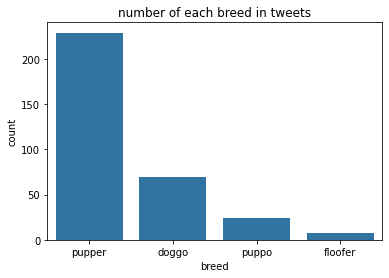

In [12]:
color_base=sb.color_palette()[0]
sb.countplot(data=df , x='breed' , color=color_base,order=df.breed.value_counts().index)
plt.title('number of each breed in tweets')
plt.show()

if we look at this chart, we understand that pupper has maximum breeds dog tweeted in our dataser. alse we found floofer breed was minimum valu in number of tweet

In [13]:
# we see in varieties of score that they are 13 values. that is why it is better to consider this variable as categorical
# variable
df.score.value_counts()

1.1    83
1.2    81
1.0    62
1.3    39
0.9    18
0.8    17
1.4    12
0.7     8
0.6     3
0.5     3
0.3     2
2.7     1
2.6     1
Name: score, dtype: int64

In [14]:
df['score']=df['score'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tweet_id         330 non-null    int64   
 1   name             330 non-null    object  
 2   breed            330 non-null    object  
 3   date             330 non-null    object  
 4   score            330 non-null    category
 5   p1               330 non-null    object  
 6   p1_conf          330 non-null    float64 
 7   p1_dog           330 non-null    bool    
 8   favorite_count   330 non-null    int64   
 9   followers_count  330 non-null    int64   
dtypes: bool(1), category(1), float64(1), int64(3), object(4)
memory usage: 22.1+ KB


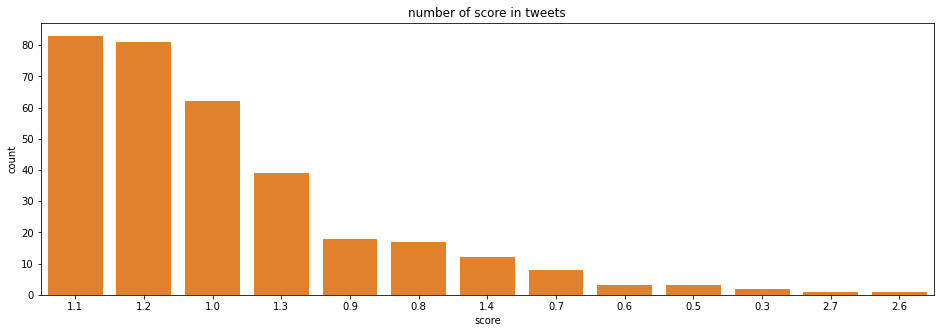

In [16]:
color_base=sb.color_palette()[1]
plt.figure(figsize=[16,5])
sb.countplot(data=df , x='score' , color=color_base,order=df.score.value_counts().index)
plt.title('number of score in tweets')
plt.show()

the maximum rate of score happened in 1.2 and minimum of it blonge to 2.6

it is really exciting to know high score in varieties of breeds (we compare it in 3 highest score with all breeds)

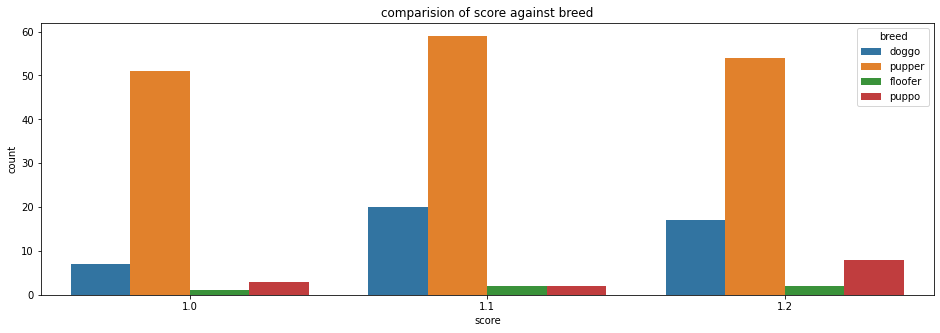

In [17]:
# color_base=sb.color_palette()[1]
df1=df.query('score==1.2 or score==1.1 or score==1')
df1.score=df1.score.astype("str")
plt.figure(figsize=[16,5])
sb.countplot(data=df1 , x='score' , hue='breed')
plt.title('comparision of score against breed')
plt.show()

we see in this graph that in pupper and doggo breed, maximum number of score belong to 1.1. but the maximum level for floofer and puppo is 1.2

now, we want to know how many methods used for prediction of breeds? and for any of them, we want to calculate count for top five of them

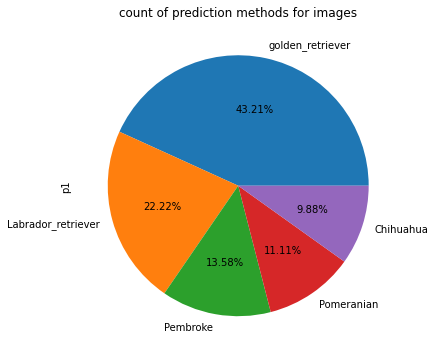

In [18]:
plt.figure(figsize=[10,6])
df['p1'].value_counts()[:5].plot(kind='pie',autopct='%1.2f%%')
plt.title('count of prediction methods for images')
plt.show()

if we pay attention this chart, we understand that the maximum count is belong to 'golden_retriever'
now we want to know for each of this top prediction, how many prediction of dog we have?

In [19]:
df2=df.query('p1=="golden_retriever" or p1=="Labrador_retriever" or p1=="Pembroke" or p1=="Pomeranian" or p1=="pug"')

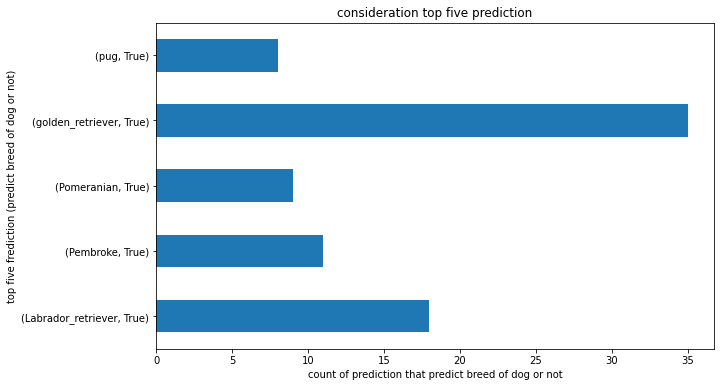

In [20]:
plt.figure(figsize=[10,6])
df2.groupby(['p1','p1_dog'])['tweet_id'].count().plot(kind='barh');
plt.title('consideration top five prediction')
plt.xlabel('count of prediction that predict breed of dog or not')
plt.ylabel('top five frediction (predict breed of dog or not)')
plt.show()

as we get from this chart, for top five prediction, all of them predict bread of dogs

at this time we are going to compare breed variable with two numeric variables (favorite_count,followers_count)

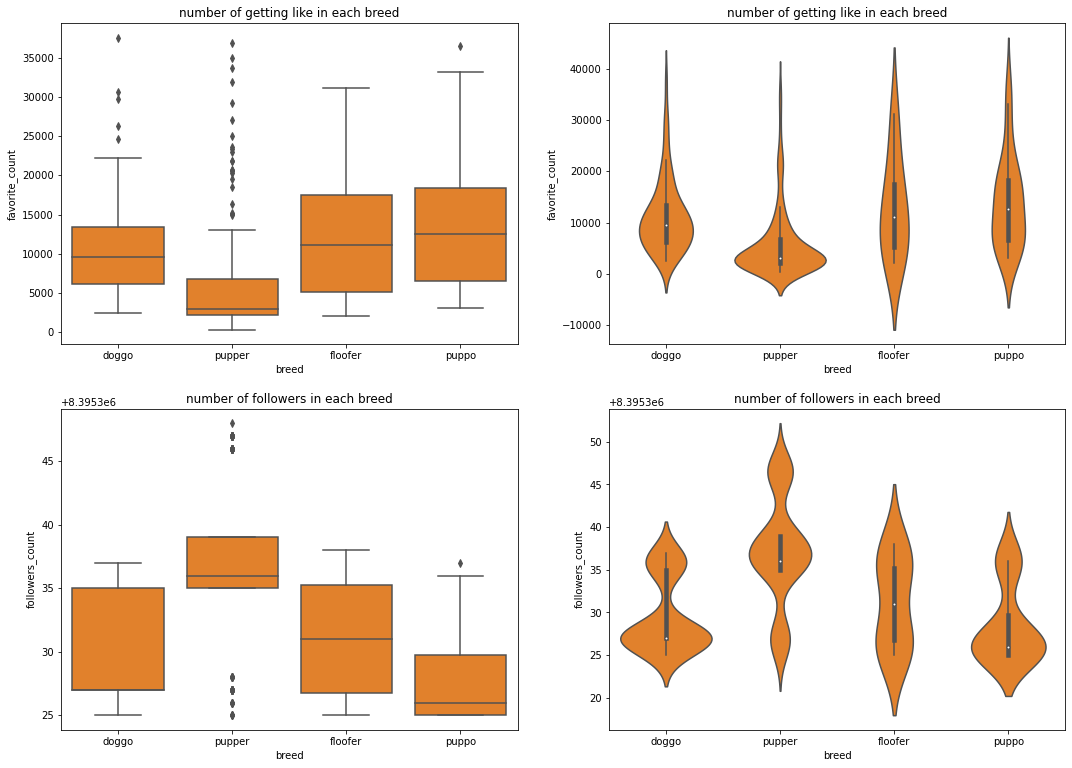

In [21]:
fig,ax = plt.subplots(nrows=2, ncols=2 , figsize=[18,13])
sb.boxplot(data=df, x='breed',y='favorite_count',color=color_base,ax=ax[0,0])
ax[0,0].set_title('number of getting like in each breed')
sb.boxplot(data=df, x='breed',y='followers_count',color=color_base,ax=ax[1,0])
ax[1,0].set_title('number of followers in each breed')
sb.violinplot(data=df, x='breed',y='favorite_count',color=color_base,ax=ax[0,1])
ax[0,1].set_title('number of getting like in each breed')
sb.violinplot(data=df, x='breed',y='followers_count',color=color_base,ax=ax[1,1])
ax[1,1].set_title('number of followers in each breed')
plt.show()

if we notice previous chart, trend of getting like from 'doggo' to 'pupper' decreased and then this trend increased from 'pupper' up to end. conversely, in number of followers, we can see this number increased from 'doggo' to 'pupper' then this value decreased from 'pupper' to 'puppo'

in this part we are going to compare three highest score variable with two numeric variables (favorite_count,followers_count)

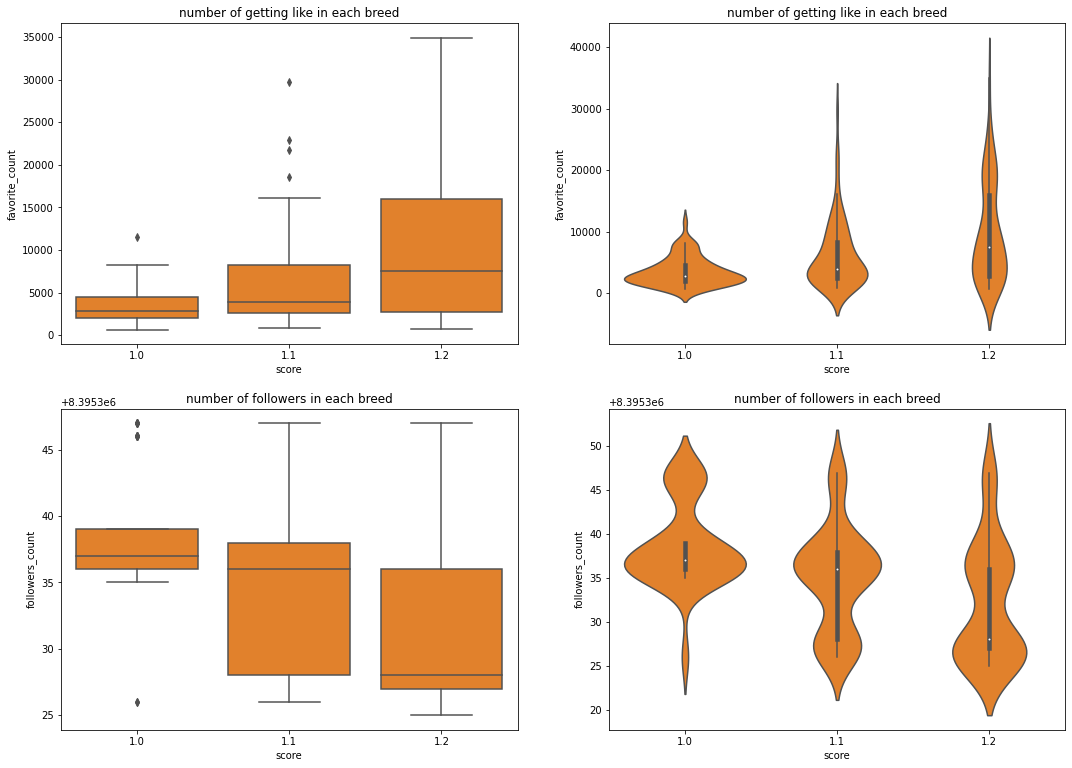

In [22]:
fig,ax = plt.subplots(nrows=2, ncols=2 , figsize=[18,13])
sb.boxplot(data=df1, x='score',y='favorite_count',color=color_base,ax=ax[0,0])
ax[0,0].set_title('number of getting like in each breed')
sb.boxplot(data=df1, x='score',y='followers_count',color=color_base,ax=ax[1,0])
ax[1,0].set_title('number of followers in each breed')
sb.violinplot(data=df1, x='score',y='favorite_count',color=color_base,ax=ax[0,1])
ax[0,1].set_title('number of getting like in each breed')
sb.violinplot(data=df1, x='score',y='followers_count',color=color_base,ax=ax[1,1])
ax[1,1].set_title('number of followers in each breed')
plt.show()

by increasing score, number of getting like gradually increased and number of followers gradually decreased.

## insight 1

'pupper' breed has maximum breeds in our dataset. also we discovered that 'floofer' breed tweeted at the minimum count

## insight 2

we found the maximum rate of dog score happened in 1.2 it shows that majority of tweets would prefer to give                    rating_numerator close to rating_denominator. high score of rating_numerator occured less

## insight 3

we understood that 'pupper' has maximum value in each score. we can 'puppo' in rating 1 and 1.2 are more than floofer, while in score 1.1 they are approximately same.

## insight 4

maximum count of prediction methods are belong to 'golden_retriever' that all of the prediction were breeds dog

## insight 5

maximum of getting like happend for 'floofer' and 'puppo' and score number 1.2 
     minimum of getting like gotten for 'pupper' and score number 1

## insight 6

maximum of getting followers happend for 'pupper' and score number 1 
   minimum of getting followers gotten for 'puppo' and score number 1.2